In [1]:
from qiskit import *
from qiskit.visualization import circuit_drawer,plot_histogram
from pathlib import Path
# Load QASM from a file
qasm_folder = Path("./qasm_files/")
qasm_filename = list(qasm_folder.glob("*.qasm")) #using glob to get a list of files.
print(qasm_filename)


[PosixPath('qasm_files/dj_indep_qiskit_10.qasm'), PosixPath('qasm_files/ghz_indep_qiskit_10.qasm')]


In [2]:
import os
def extract_filename(file_path):
    filename = os.path.basename(file_path) 
    if ".qasm" in filename:
        return filename.split(".qasm")[0] 

In [3]:
import time
result_dict_qsim={}
backend = BasicAer.get_backend('dm_simulator')
j=1
for i in qasm_filename: 
    with open(i, "r") as file:
        qasm_str = file.read()  # Read QASM as string
        circuit = QuantumCircuit.from_qasm_str(qasm_str)
        ckt_name=extract_filename(i)
        start= time.time()
        print("====================== AlgoNumber-",j,"out of 18 -",ckt_name,"===================================")
        #print(circuit)
        run = execute(circuit,backend)
        end= time.time()
        result = run.result()
        print("Execution time:: ", end-start,"seconds")
        #probability=result.get_counts()
        #result_dict_qsim[ckt_name]=result
        #print('Density Matrix: \n',result['results'][0]['data']['densitymatrix'])
        result_dict_qsim[ckt_name]=result.results[0].data.partial_probability
        j=j+1
#print(result_dict_qsim)

====================== AlgoNumber- 1 out of 18 - dj_indep_qiskit_10 ===================================
Execution time::  12.867644548416138 seconds
====================== AlgoNumber- 2 out of 18 - ghz_indep_qiskit_10 ===================================
Execution time::  11.72371768951416 seconds


dj_indep_qiskit_10
ghz_indep_qiskit_10


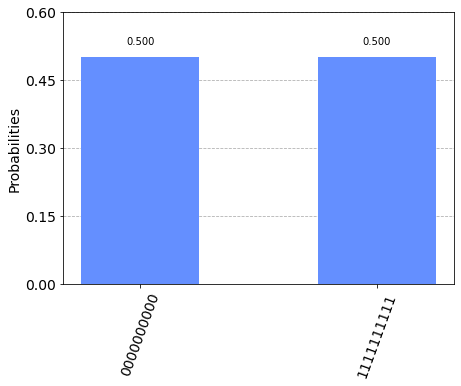

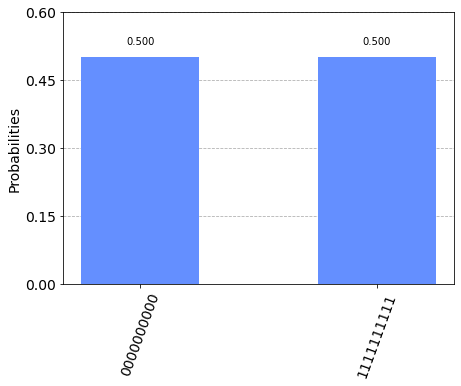

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("TkAgg")
for ckt, probs in result_dict_qsim.items():
    print(ckt) 
    plot_histogram(non_zero_probs).show()
    #plt.savefig(f"{ckt}.png")